Installing the pystan and prophet dependencies.

In [2]:
import pandas as pd
from prophet import Prophet
import numpy

Using pandas, read_csv() to read from the data points

In [5]:
df = pd.read_csv("../backend/data.csv")

In [6]:
df.head()

,Date,Price,Open,High,Low,Vol,Change %
0,2023-03-31,2.6206,2.5716,2.6253,2.5576,NaN,2.22%
1,2023-03-30,2.5638,2.5557,2.5948,2.5426,56.44K,-0.11%
2,2023-03-29,2.5665,2.6390,2.6562,2.5527,73.73K,-3.01%
3,2023-03-28,2.6461,2.6414,2.6811,2.6240,60.89K,-0.20%
4,2023-03-27,2.6515,2.5850,2.6608,2.5656,64.27K,-1.62%


In order to preprocess the data, we need to convert the Date column from its current data type of 'String' to a 'DateTime' format in the format of YYYY-MM-DD.

In [7]:
df['Year'] = df['Date'].apply(lambda x: str(x)[:4])
df['Month'] = df['Date'].apply(lambda x: str(x)[5:7])
df['Day'] = df['Date'].apply(lambda x: str(x)[8:])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])
df.head()

,Date,Price,Open,High,Low,Vol,Change %,Year,Month,Day,ds
0,2023-03-31,2.6206,2.5716,2.6253,2.5576,NaN,2.22%,2023,03,31,2023-03-31
1,2023-03-30,2.5638,2.5557,2.5948,2.5426,56.44K,-0.11%,2023,03,30,2023-03-30
2,2023-03-29,2.5665,2.6390,2.6562,2.5527,73.73K,-3.01%,2023,03,29,2023-03-29
3,2023-03-28,2.6461,2.6414,2.6811,2.6240,60.89K,-0.20%,2023,03,28,2023-03-28
4,2023-03-27,2.6515,2.5850,2.6608,2.5656,64.27K,-1.62%,2023,03,27,2023-03-27


Excluding the unnecessary columns and retain only the columns that contain the date and heating oil prices. Renaming the columns as 'y' and 'ds' respectively.

In [9]:
df.drop(['Date', 'Open', 'High', 'Low', 'Vol', 'Change %', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']
df.head()

,y,ds
0,2.6206,2023-03-31
1,2.5638,2023-03-30
2,2.5665,2023-03-29
3,2.6461,2023-03-28
4,2.6515,2023-03-27


In [10]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

/Users/adityapatel/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.5743
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       16588.4     0.0115536       3797.59           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       17440.3     0.0240417        3042.7           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       17624.3     0.0284646       1859.88      0.6379      0.6379      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       17689.4    0.00440234       358.962           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       17734.7     0.0105812       1243.31           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [11]:
future = m.make_future_dataframe(periods=200,freq='D')
forecast = m.predict(future)
forecast.head()

/Users/adityapatel/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/adityapatel/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-31,0.579141,-0.069773,1.237874,0.579141,0.579141,-0.001505,-0.001505,-0.001505,0.073922,...,-0.007541,-0.007541,-0.007541,-0.067886,-0.067886,-0.067886,0.0,0.0,0.0,0.577636
1,1990-02-01,0.579068,-0.054043,1.208822,0.579068,0.579068,0.000014,0.000014,0.000014,0.073922,...,-0.005306,-0.005306,-0.005306,-0.068603,-0.068603,-0.068603,0.0,0.0,0.0,0.579082
2,1990-02-02,0.578995,-0.099800,1.260089,0.578995,0.578995,-0.002060,-0.002060,-0.002060,0.073922,...,-0.006781,-0.006781,-0.006781,-0.069201,-0.069201,-0.069201,0.0,0.0,0.0,0.576935
3,1990-02-05,0.578776,-0.033453,1.187804,0.578776,0.578776,-0.005790,-0.005790,-0.005790,0.073922,...,-0.009597,-0.009597,-0.009597,-0.070115,-0.070115,-0.070115,0.0,0.0,0.0,0.572985
4,1990-02-06,0.578703,-0.097121,1.197687,0.578703,0.578703,-0.005993,-0.005993,-0.005993,0.073922,...,-0.009839,-0.009839,-0.009839,-0.070076,-0.070076,-0.070076,0.0,0.0,0.0,0.572710


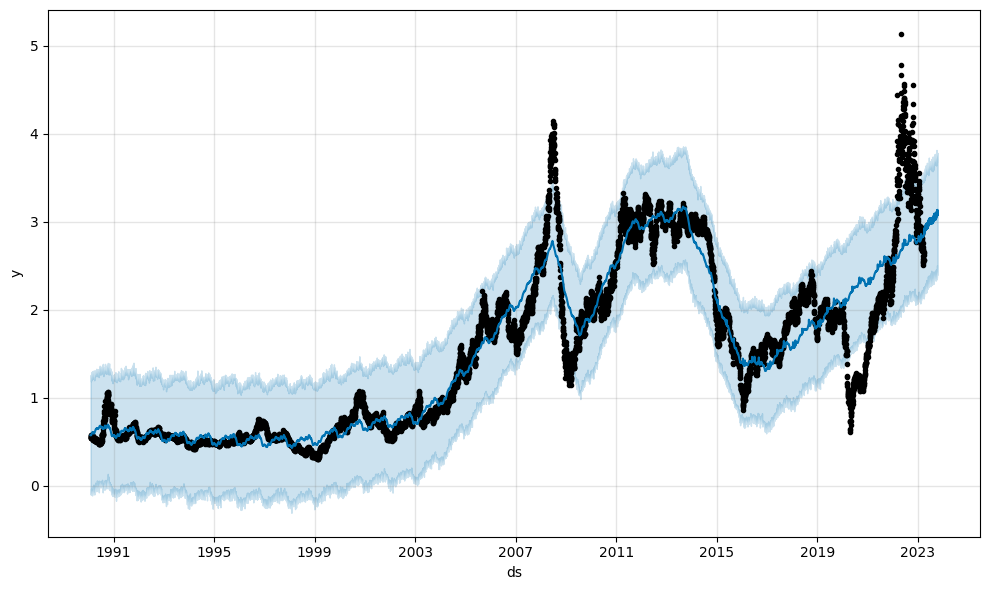

In [12]:
plot1 = m.plot(forecast)

/Users/adityapatel/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/adityapatel/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/adityapatel/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


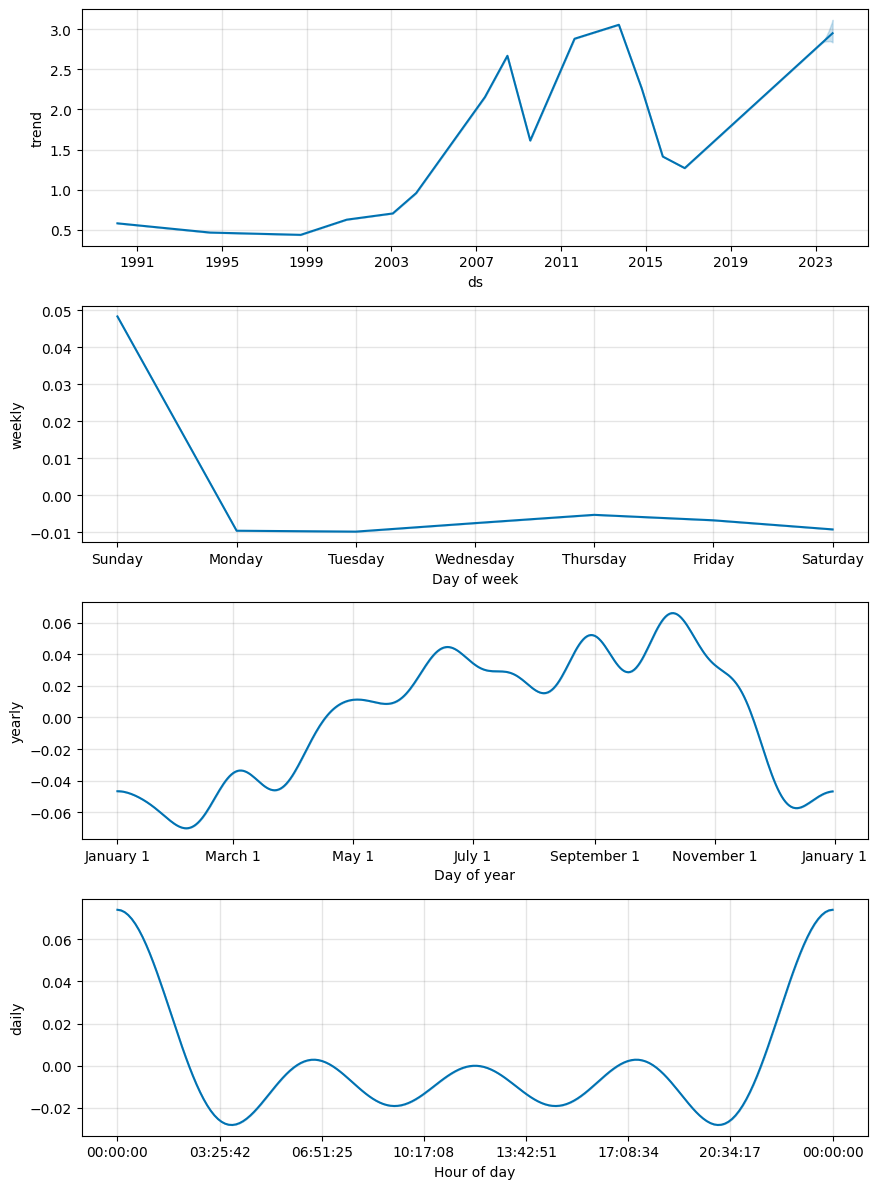

In [13]:
plt2 = m.plot_components(forecast)